In [ ]:
 import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = 'heart.csv'
df = pd.read_csv(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
x = df.drop(columns=['target'])
y = df['target']
print(x.shape)
print(y.shape)

(303, 13)
(303,)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)


(227, 13)
(76, 13)
(227,)


In [ ]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3


In [ ]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

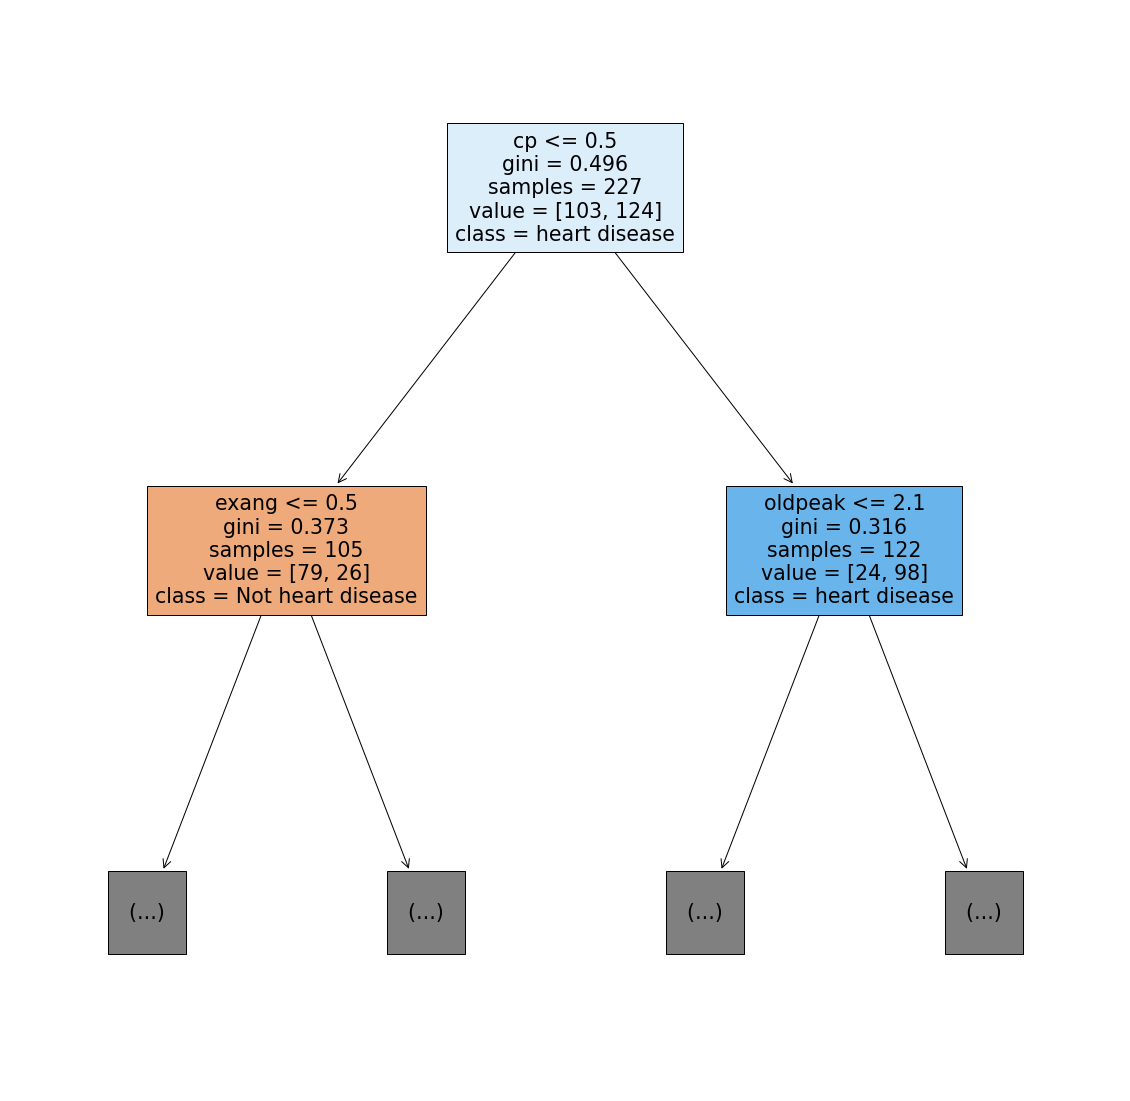

In [ ]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(clf,feature_names=features,max_depth=1,class_names=classes,filled=True)
plt.show()

In [ ]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 1.0
Test score 0.6842105263157895
Train Confusion matrix


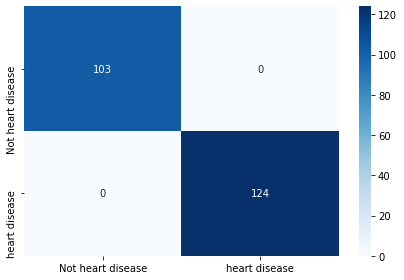

Test Confusion matrix


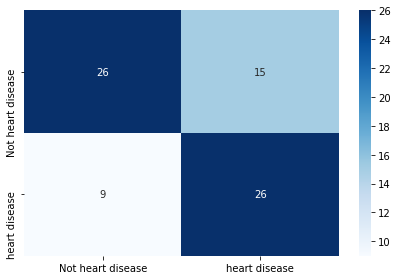

In [ ]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

# Pre pruning techniques
Pre pruning is nothing but stoping the growth of decision tree on an early stage. For that we can limit the growth of trees by setting constrains. We can limit parameters like max_depth , min_samples etc.

An effective way to do is that we can grid search those parameters and choose the optimum values that gives better performace on test data.

As of now we will control these parameters

max_depth: maximum depth of decision tree



min_sample_split: The minimum number of samples required to split an internal node:


min_samples_leaf: The minimum number of samples required to be at a leaf node.






In [ ]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Train score 0.9515418502202643
Test score 0.6842105263157895
Train Confusion matrix


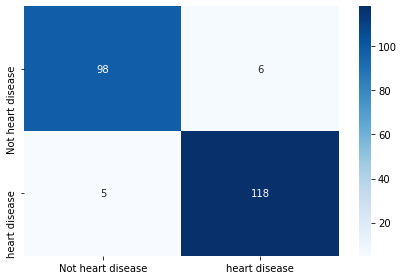

Test Confusion matrix


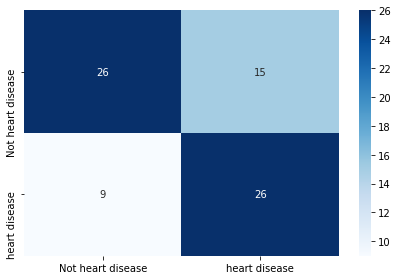

In [ ]:
model = gcv.best_estimator_
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

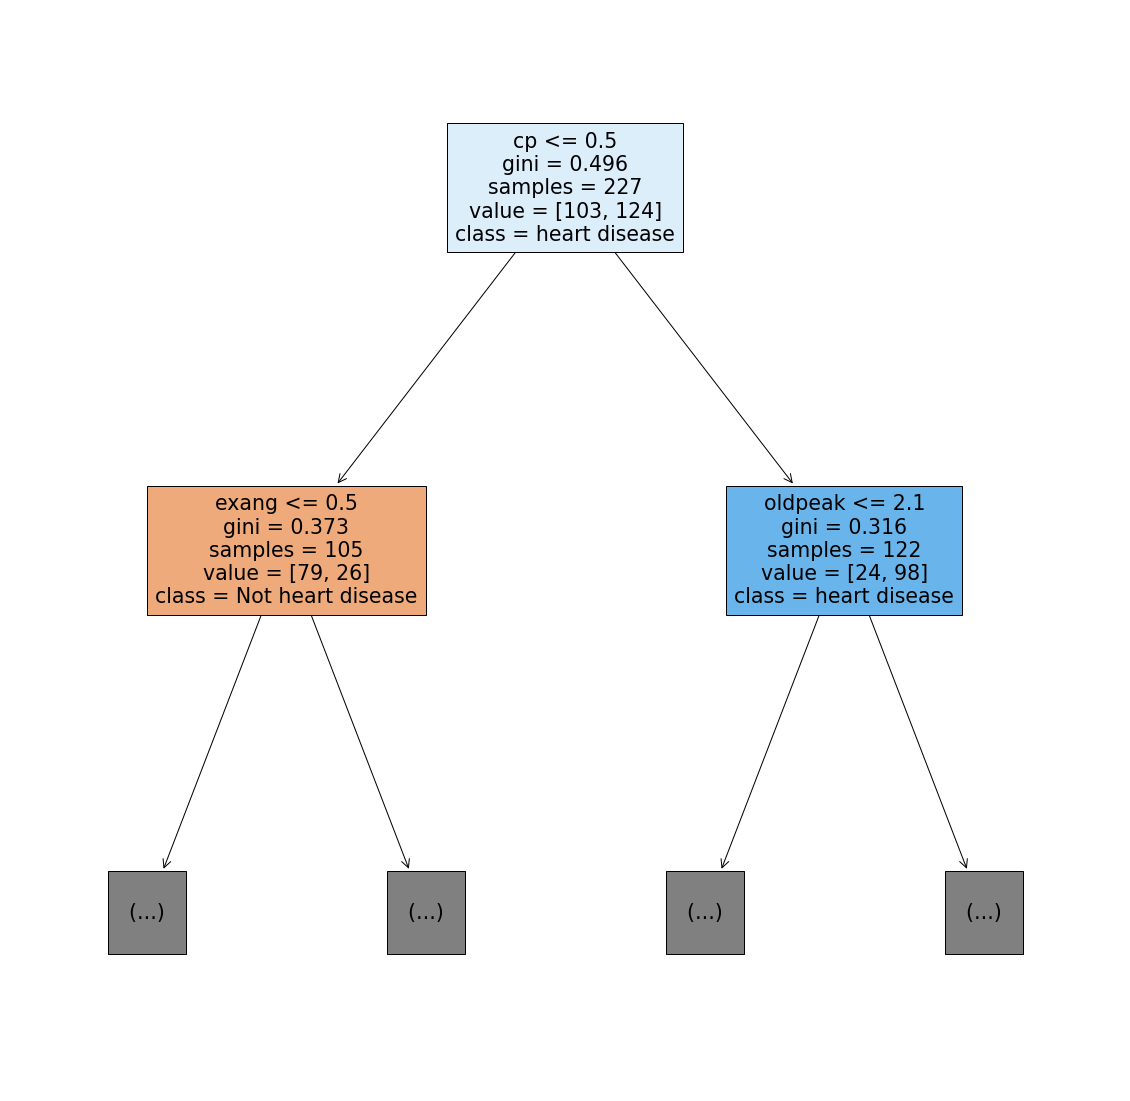

In [ ]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(model,feature_names=features,max_depth=1,class_names=classes,filled=True)
plt.show()

# 2. Post pruning techniques
There are several post pruning techniques. Cost complexity pruning is one of the important among them.

Cost Complexity Pruning
Decision trees can easily overfit. One way to avoid it is to limit the growth of trees by setting constrains. We can limit parameters like max_depth , min_samples etc. But a most effective way is to use post pruning methods like cost complexity pruning. This helps to improve test accuracy and get a better model.

Cost complexity pruning is all about finding the right parameter for alpha.We will get the alpha values for this tree and will check the accuracy with the pruned trees.

In [ ]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00416055 0.00419551 0.00432217 0.00493555 0.00660793
 0.00660793 0.0076282  0.00783162 0.00800961 0.00819383 0.00821011
 0.00841009 0.01189427 0.01571151 0.02430877 0.05083214 0.15351299]


In [ ]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

In [ ]:
clfs

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00416054821341165, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00419551080344032, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0043221677333554935, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0049355522923804854, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006607929515418502, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006607929515418502, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007628201460800578, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007831620166421928, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.008009611533840609, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.008193832599118944, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.008210112382093394, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.008410092110532643, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.011894273127753305, random_state=0),
 DecisionT

In [ ]:
ccp_alphas

array([0.        , 0.00416055, 0.00419551, 0.00432217, 0.00493555,
       0.00660793, 0.00660793, 0.0076282 , 0.00783162, 0.00800961,
       0.00819383, 0.00821011, 0.00841009, 0.01189427, 0.01571151,
       0.02430877, 0.05083214, 0.15351299])

In [ ]:
clf.tree_.node_count

1

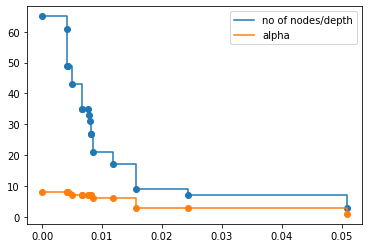

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes/depth',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='alpha',drawstyle="steps-post")
plt.legend()
plt.show()

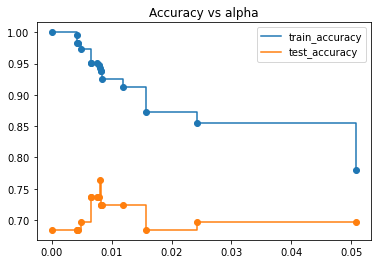

In [ ]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.8722466960352423
Test score 0.6842105263157895
Train Confusion matrix


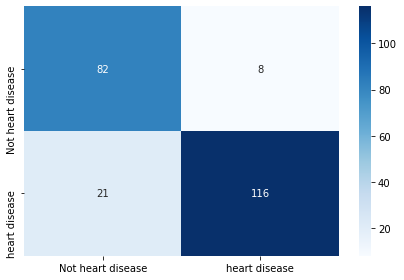

Test Confusion matrix


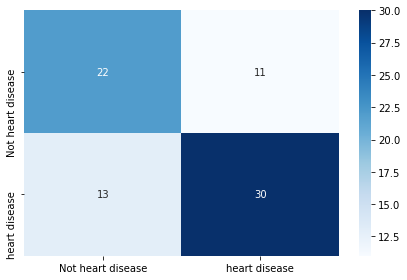

In [ ]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.020)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

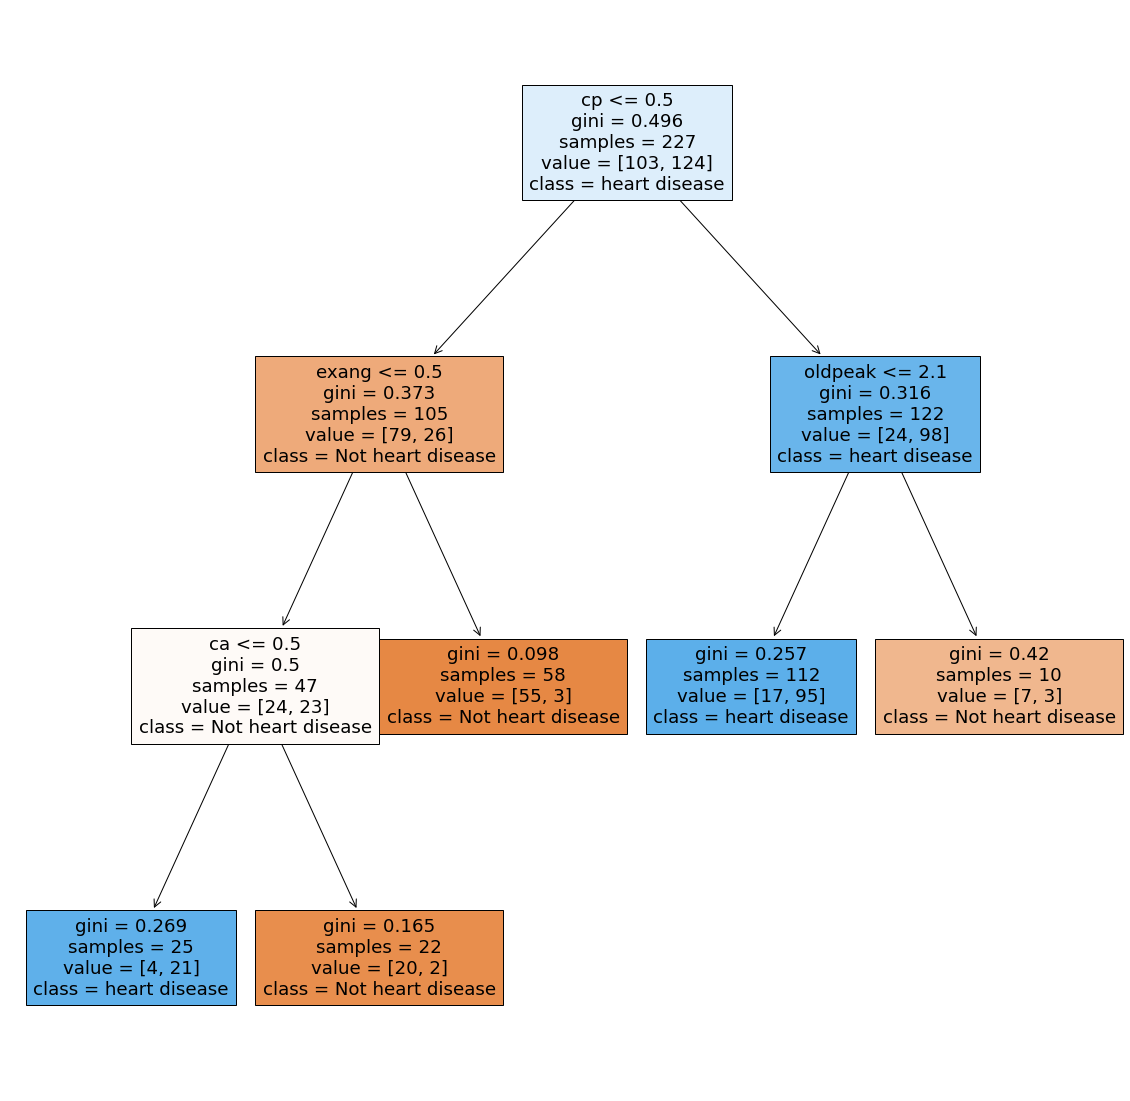

In [ ]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()